# Tarea 2 Machine Learning - Métodos para clasificación 

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

 ### 1- Tipos de fronteras en Clasificación


Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos. Los ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es que estos ejemplos tendrán fronteras lineales o no.  
Con el propósito de analizar los distintos tipos de fronteras que definen los algoritmos de clasificación, se trabajará con un dataset sintético de 2 dimensiones conformado por dos conjuntos de datos, pudiendo ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos es ovalado mientras que el otro es una semi-luna.  
Se agrega ruido en los conjuntos para que no sea un problema trivial.  

El código que los genera es:

In [260]:
import numpy as np
n_samples=500
#promedio de los datos // Media de la distribución N-dimensional.
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

In [261]:
print (datos1.shape)
print (datos2.shape)

(500, 2)
(500, 2)


Así entonces, el conjunto 1, compuesto por 500 datos centrados en (0,-4) con matriz de covarianza C, corresponde a una muestra aleatoria de una distribución normal multivariada. Mientras que el conjunto 2 corresponde efectivamente a una muestra aleatoria de 500 datos igualmente, sujeto a funciones Sin() y Cos().


###### a. Construir un dataset común con los dos conjuntos generados. 

In [262]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

In [263]:
print (X.shape)
print ("La cantidad de registros para el conjunto de datos 1 (óvalo) corresponde a: ", len(y1))
print ("La cantidad de registros para el conjunto de datos 2 (semiluna) corresponde a: ", len(y2))

(1000, 2)
La cantidad de registros para el conjunto de datos 1 (óvalo) corresponde a:  520
La cantidad de registros para el conjunto de datos 2 (semiluna) corresponde a:  480


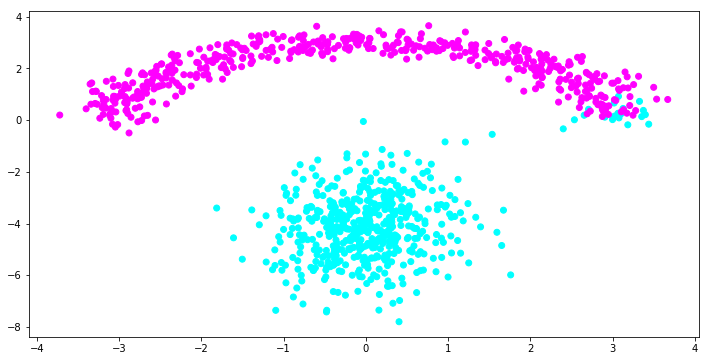

In [264]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')
plt.show()

Se realiza un shift de 20 datos (ruido) pertenecientes al conjunto 2 hacia el conjunto de datos 1 con el propósito de trabajar con un dataset no ideal. Así entonces, el conjunto 1 contiene 520 registros mientras que el conjunto 2 contiene 480.  
La situación descrita se puede apreciar claramente en el gráfico expuesto. 

##### Para visualizar las fronteras producidas por los diferentes algoritmos clasificadores se utiliza:

In [265]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(16,8))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

###### b. Entrenar el clasificador Linear Discriminant Analysis (LDA) y visualizar la frontera de decisión que éste define.   

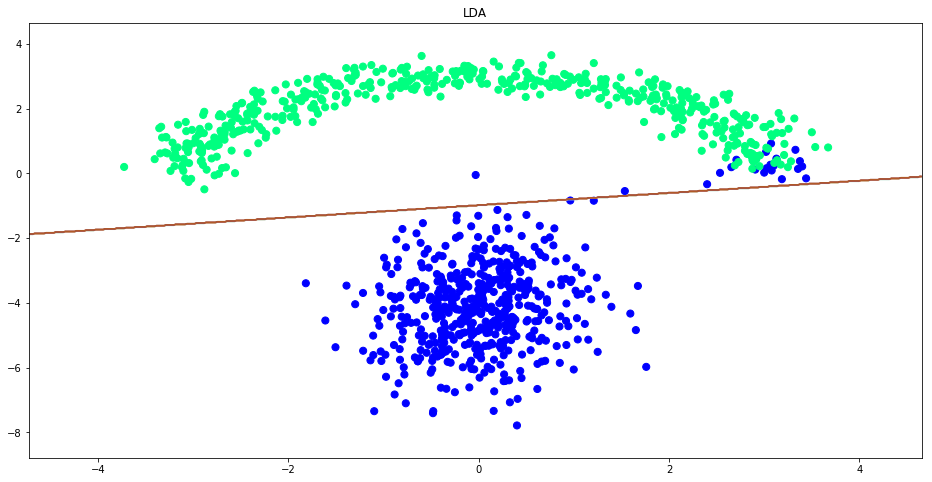

In [266]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
modelL = LDA()
modelL.fit(X,y)
visualize_border(modelL,X,y,"LDA")

Se observa claramente que la frontera determinada por el algoritmo, entre ambos conjuntos de datos, se trata de una frontera lineal. Esto se debe a que el algoritmo asume matrices de covarianza iguales entre los diferentes conjuntos de datos (además de distribución gaussiana multivariada), dejando a cada una de estas guassianas en igual dirección, precisando de una separación lineal.   

Se logra apreciar un buen desempeño del algoritmo. Sin embargo, algunos puntos resultan ser clasificados de manera incorrecta quedando por sobre la frontera establecida puesto que la distribución de los datos de trabajo no requieren, evidentemente, de una separación lineal. Una clase describe una semiluna y la otra clase un óvalo de manera tal que ambos conjuntos no se hayan lo suficientemente separados como para permitir una frontera de tales características que no clasifique incorrectamente algunos puntos marginales.   

###### c. Entrenar el clasificador Quadratic Discriminant Analysis (QDA) y visualizar la frontera de decisión que éste define.


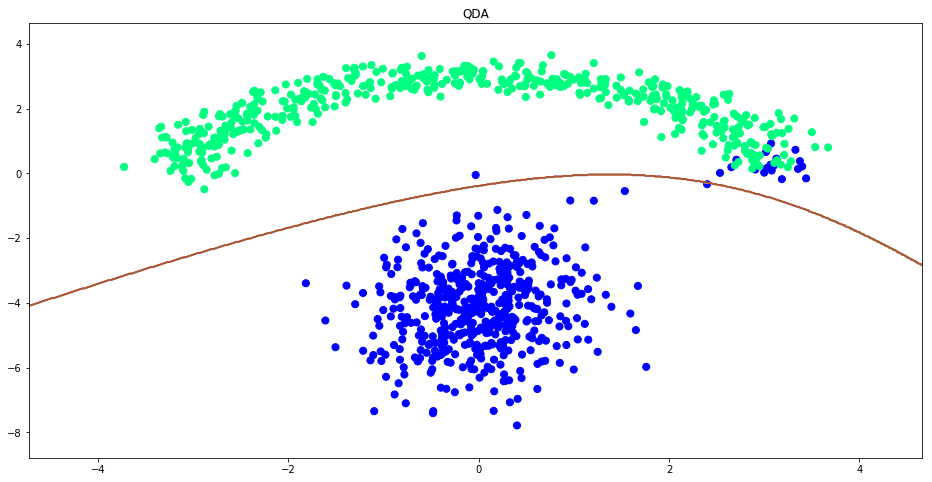

In [267]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
modelQ = QDA()
modelQ.fit(X,y)

visualize_border(modelQ,X,y,"QDA")

A diferencia de LDA, QDA logra un mejor desempeño clasificando de manera diferenciada los conjuntos de datos. Es decir, diferencia de mejor manera las diferentes etiquetas de los datos en cuestión pues emplea una frontera cuadrática que le permite ser mucho más flexible que una recta.

Tanto LDA como QDA se derivan de modelos probabilísticos que modelan la distribución condicional de las clases (etiquetas) de los datos.  Las predicciones de éstas se obtienen utilizando la regla de Bayes y seleccionando aquella que maximice la probabilidad $P(y=k|x)$, siendo $y$ la etiqueta/clase asignada. O, más específicamente, se modelan como una distribución gaussiana multivariada.  

En el caso de LDA, se supone que las distribuciones gaussianas de los diferentes conjuntos de datos (clases) comparten la misma matriz de covarianza, lo  que conduce a fronteras de decisión lineales.  

En el caso de QDA, no hay suposiciones sobre las matrices de covarianza de las distribuciones gaussianas, conduciendo a fronteras de decisión cuadráticas. Tal como se puede evidenciar en los gráficos obtenidos.

###### d. Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintetico mediante la metrica de error de clasificación.

In [268]:
from sklearn.metrics import accuracy_score
yLDA = modelL.predict(X)
yQDA = modelQ.predict(X)
print("Miss Classification Loss - LDA: %f"%(1-accuracy_score(y, yLDA)))
print("Miss Classification Loss - QDA: %f"%(1-accuracy_score(y, yQDA)))

Miss Classification Loss - LDA: 0.022000
Miss Classification Loss - QDA: 0.020000


Se observa que el algoritmo de LDA logra un desempeño bastante aceptable pero levemente inferior a QDA puesto que éste último, la hacer uso de una frontera cuadrática, lo posiciona como un algoritmo mucho más potente. Sin embargo, ésto puede variar dependiendo de los datos con los cuales se trabaje obteniendo, en algunos casos, un desempeño equivalente.  
Para este caso en particular, la métrica **Miss Classification Loss ** en cuanto a **LDA** fue de 2.2% mientras que para **QDA**, 2,0%. Así entonces, se aprecia que al trabajar con la cantidad y disposición de los datos generados (datos1 y datos2), LDA y QDA logran un desempeño similar en términos del error de entrenamiento. Lo que no significa que frente a datos futuros la eficacia relativa de los modelos mantengan esta característica.  

De todos modos, con el fin de demostrar que efectivamente las fronteras obtenidas difieren en comportamiento, se modelan nuevamente los datos:

#### Nuevo muestreo:

In [10]:
def visualize_border(model,x,y,y_p,title=""):
    print("Miss Classification Loss: %f"%(1-accuracy_score(y, y_p)))
    fig = plt.figure(figsize=(16,8))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

Miss Classification Loss: 0.023000


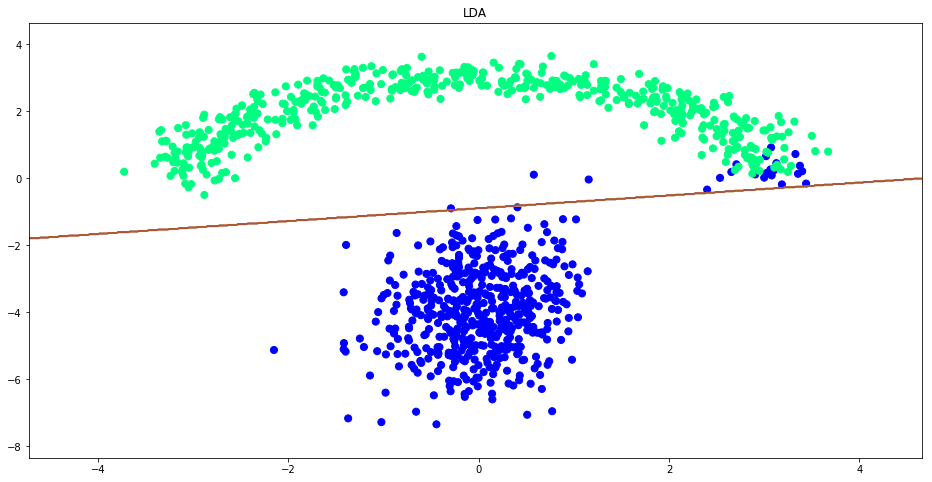

Miss Classification Loss: 0.020000


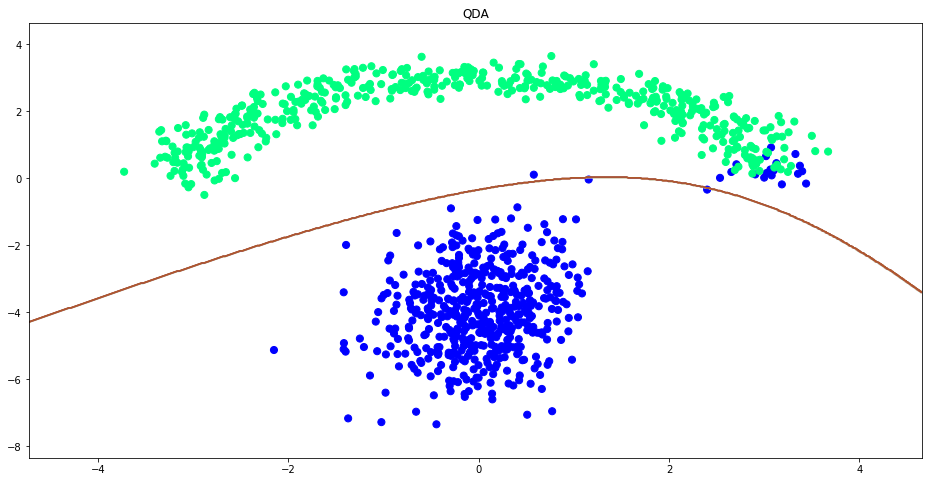

Miss Classification Loss - LDA (nueva ejecución): 0.023000
Miss Classification Loss - QDA (nueva ejecución): 0.020000


In [11]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

n_samples=500
#promedio de los datos // Media de la distribución N-dimensional.
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

modelL = LDA()
modelL.fit(X,y)
yLDA = modelL.predict(X)
visualize_border(modelL,X,y,yLDA,"LDA")

modelQ = QDA()
modelQ.fit(X,y)
yQDA = modelQ.predict(X)
visualize_border(modelQ,X,y,yQDA,"QDA")

print("Miss Classification Loss - LDA (nueva ejecución): %f"%(1-accuracy_score(y, yLDA)))
print("Miss Classification Loss - QDA (nueva ejecución): %f"%(1-accuracy_score(y, yQDA)))

Así entonces, se aprecia lo anteriormente expuesto: QDA es más poderoso, en términos de ajuste a los datos de entrenamiento, que LDA obteniendo una tasa de error del 2% versus 2.3%.

#### Para lo que sigue de la actividad se trabajara con una widget interactiva de sintonización de parámetros de regularización para los distintos algoritmos.  Por ello cada vez que se modifique el parámetro en la ventana se entrenará el modelo y se visualizará la frontera en la misma imagen.

In [12]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model, y_p = train_model(param)
    visualize_border(model,X,y, y_p)

#### e. Construir una función que entrene/ajuste un modelo de Regresión Logística Regularizado

In [57]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR()
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    y_p=model.predict(X)
    print ("Vector beta: ", model.coef_)
    return model, y_p
p_min = 1
p_max = 100000
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

\begin{equation}
f_{RLog} = \ \ Min_{w} \left[\frac{w^T w}{2} + C \sum_{i=1}^{n} \ \ Log(exp (-y(X^T w))+1)\right]
\end{equation}

Se puede apreciar que cuando el parámetro de regularización del modelo de regresión logística aplicado por la librería ($C$ en $f_{RLog}$), corresponde a un valor alto, entonces el desempeño del algoritmo se corresponde con una Regresión Logística no regularizada teniendo menor tolerancia a errores, tal como se aprecia al interactuar con la widget del gráfico expuesto.  

A continuación, con el fin de validar este análisis y para mayor comprensión del lector, se muestra el vector $w$ obtenido según el algoritmo para las diferentes configuraciones del parámetro $C$ donde se evidencia la baja tasa de error en cada una de éstas traduciéndose en la no variabilidad de la frontera propuesta por el algoritmo.

In [65]:
model=LR()
for i in range(1, 1000, 50):
    model.set_params(C=i,penalty='l2')
    model.fit(X,y)
    print ("Con C= ",i , " se obtiene Beta=", model.coef_, "Miss Classification Loss: ", (1-accuracy_score(y, model.predict(X))))
    

Con C=  1  se obtiene Beta= [[-0.64819246  3.38398213]] Miss Classification Loss:  0.013
Con C=  51  se obtiene Beta= [[-0.99995865  5.38151279]] Miss Classification Loss:  0.014
Con C=  101  se obtiene Beta= [[-1.01118651  5.45316186]] Miss Classification Loss:  0.014
Con C=  151  se obtiene Beta= [[-1.01513158  5.47844081]] Miss Classification Loss:  0.014
Con C=  201  se obtiene Beta= [[-1.0171448   5.49136152]] Miss Classification Loss:  0.014
Con C=  251  se obtiene Beta= [[-1.01836613  5.49920666]] Miss Classification Loss:  0.014
Con C=  301  se obtiene Beta= [[-1.01918602  5.50447602]] Miss Classification Loss:  0.014
Con C=  351  se obtiene Beta= [[-1.01977447  5.5082593 ]] Miss Classification Loss:  0.014
Con C=  401  se obtiene Beta= [[-1.02021735  5.51110747]] Miss Classification Loss:  0.014
Con C=  451  se obtiene Beta= [[-1.02056273  5.5133291 ]] Miss Classification Loss:  0.014
Con C=  501  se obtiene Beta= [[-1.02083962  5.51511045]] Miss Classification Loss:  0.014
Co

Para analizar qué ocurre en los valores más bajos del parámetro $C$ se dispone a continuación un nuevo gráfico interactivo que se mueve en el ranfo de 0.00001 hasta 0.9

In [15]:
p_min = 0.00001
p_max = 0.9
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

Ahora bien, si el parámetro de regularización es un valor bajo, el algoritmo de Regresión Logística efectivamente se comporta como un método regularizado tolerando mayor error y haciendo tender los vectores $w$ hacia la solución más simple, vectores nulos.
Esto se evidencia en la frontera graficada (C = 0.00001), la cual varia notablemente respecto a los valores altos del el parámetro de regularización. 

A continuación, de manera similar a lo anteriormente expuesto, se presenta la tasa de error obtenida para los diferentes valores del parámetro $C$ donde se evidencia el nivel de regularización del algoritmo para cada una de éstos.  
Cabe destacar que el nivel de regularización más fuerte se produce, tal como ya se indicó, cuando $C$ toma el valor más bajo.

In [67]:
model=LR()
for i in np.arange(0.00001, 0.01, 0.0002):
    model.set_params(C=i,penalty='l2')
    model.fit(X,y)
    print ("Con C= ",i , " se obtiene Beta=", model.coef_, "Miss Classification Loss: ", (1-accuracy_score(y, model.predict(X))))
    

Con C=  1e-05  se obtiene Beta= [[-0.00059775  0.01420683]] Miss Classification Loss:  0.017
Con C=  0.00021  se obtiene Beta= [[-0.01173536  0.19941906]] Miss Classification Loss:  0.015
Con C=  0.00041  se obtiene Beta= [[-0.02115763  0.30265537]] Miss Classification Loss:  0.016
Con C=  0.00061  se obtiene Beta= [[-0.02919774  0.37530726]] Miss Classification Loss:  0.014
Con C=  0.00081  se obtiene Beta= [[-0.03622962  0.43193514]] Miss Classification Loss:  0.014
Con C=  0.00101  se obtiene Beta= [[-0.04245163  0.47861408]] Miss Classification Loss:  0.014
Con C=  0.00121  se obtiene Beta= [[-0.04801089  0.51851346]] Miss Classification Loss:  0.014
Con C=  0.00141  se obtiene Beta= [[-0.05310922  0.55340921]] Miss Classification Loss:  0.014
Con C=  0.00161  se obtiene Beta= [[-0.05778678  0.58446641]] Miss Classification Loss:  0.014
Con C=  0.00181  se obtiene Beta= [[-0.06210156  0.6125556 ]] Miss Classification Loss:  0.014
Con C=  0.00201  se obtiene Beta= [[-0.06611786  0.6

Desde el gráfico, se puede apreciar que para un $C$ = 0.00001, LR no genera una muy buena frontera de decisión. Esto se debe a que el modelo quedó demasiado regularizado ($\vec{w} \rightarrow 0$) y, por ello, es mucho más complejo determinar una buena solución.  
Por ejemplo, para un $C$=0.1 se evidencia una mejora en el comportamiento de la frontera de decisión (variar este valor a partir de la widget interactiva). 

###### f. Construir una función que entrene/ajuste una Máquina de Vectores de Soporte Lineal. 

Support Vector Machine para clasificación (o Support Vector Classification), basado en la librería 'libsvm',  busca separar las clases de los datos analizados mediante un hiperplano.   
Las características de este hiperplano corresponden a que tiene la mayor distancia a los datos de entrenamiento más cercanos de cualquier clase. Esto con el fin de minimizar el error de generalización del clasificador.  
Para lograr su objetivo, SVC establece la siguiente función objetivo: 

\begin{equation}
f_{SVM} = \ \ Min_{\beta, b, \zeta} \left[ \frac{\beta^T \beta}{2} + C \sum_{i=1}^{n} \zeta\right]
\end{equation}
Sujeto a: 
\begin{equation}
y_i(\beta^T \phi(x_i) + b) \geq 1 - \zeta, \\ \zeta_i \geq 0 \ \ i=1, \ldots, n \\
\end{equation}

A continuación se presenta el desempeño del algoritmo SVM bajo un kernel **lineal**, lo que indica que la frontera de clasificación de los datos (clase 1 o 2) definida corresponde a una recta.

In [17]:
def visualize_border_interactiveL(param):
    model, y_p = train_modelL(param)
    visualize_border(model,X,y, y_p)

In [18]:
from sklearn.svm import SVC as SVM 
def train_modelL(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    print ("\n Vector beta: ", model.coef_)
    y_p=model.predict(X)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model, y_p

In [19]:
minimo=0.0001
maximo=500
interactive(visualize_border_interactiveL,param=(minimo,maximo))

A Jupyter Widget

Similar al comportamiento que tiene el algoritmo de Regresión Logística, se aprecia que cuando el parámetro de regularización ($C$) toma valores altos, el desempeño del algoritmo se corresponde al de una Máquina de Vectores de Soporte no regularizada no tolerando errores de clasificación y estableciendo una frontera muy estricta para ello.

Bajo la configuración ($C$=500), se aprecia que los vectores de soporte (datos anaranjados) que definen la frontera obtenida corresponden a:

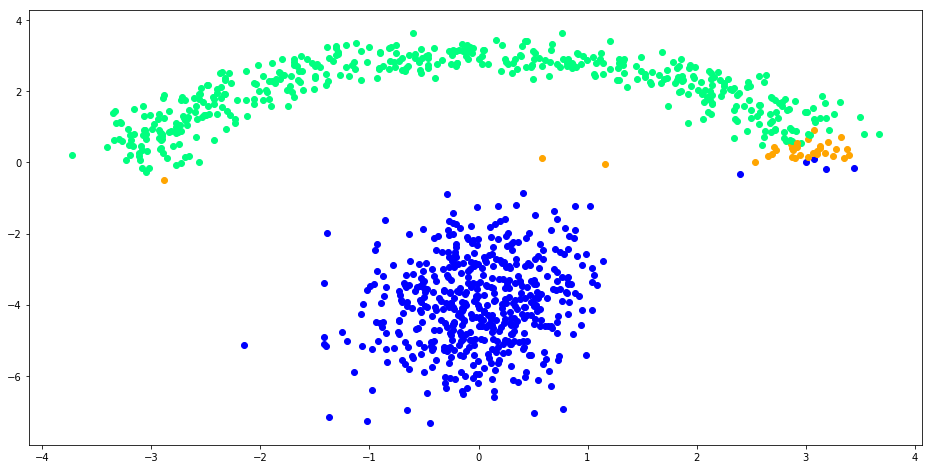

In [68]:
svm= SVM().set_params(C=500,kernel='linear').fit(X,y)
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Evidentemente la cantidad de vectores de soporte es muy baja comparada al total de datos con los que se cuenta. Esto indica que la frontera de decisión, tal como ya se mencionó, corresponde a una frontera muy estricta (delgada), por lo que la máquina debe tomar muy buenas decisiones para trabajar en base a muy pocos datos (vectores de soporte) que permitan minimizar los errores. 

Así entonces, con el fin de analizar qué ocurre con los vectores de soporte cuando el parámetro de regularización se disminuye, se estableció el valor de $C$ como 0.01: 

In [21]:
minimo=0.01
maximo=10
interactive(visualize_border_interactiveL,param=(minimo,maximo))

A Jupyter Widget

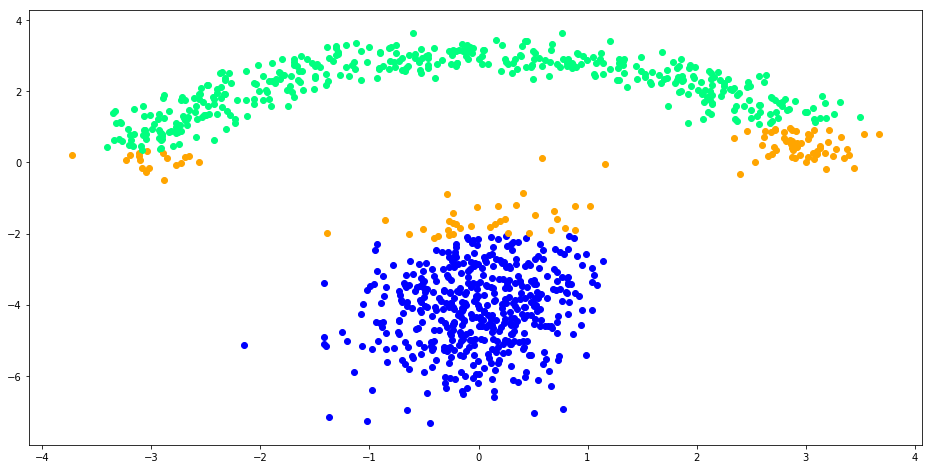

In [22]:
svm= SVM().set_params(C=0.01,kernel='linear').fit(X,y)
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Donde se aprecia que el número de vectores de soporte con los cuales trabajó el algoritmo, aumenta. Esto ocurre debido a que, de manera contraria al caso ya observado con $C$ alto, la máquina tiene mayor tolerancia a errores estableciendo una frontera mucho más holgada/amplia.

Por lo tanto, es correcto afirmar que si se trabaja con un parámetro de regularización bajo, SVM se comporta como un método regularizado.   
De manera gráfica, se puede notar que para $C$ = 0.0001, la frontera definida varia notablemente respecto a los valores altos de $C$.

In [23]:
minimo=0.0001
maximo=0.4
interactive(visualize_border_interactiveL,param=(minimo,maximo))

A Jupyter Widget

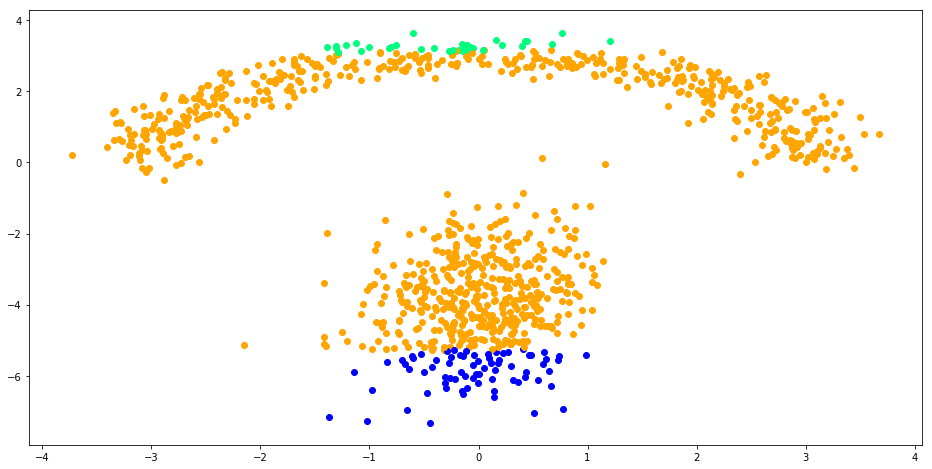

In [24]:
svm= SVM().set_params(C=0.0001,kernel='linear').fit(X,y)
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

La cantidad de vectores de soporte definidos por el algoritmo aumentó considerablemente. Esto se explica desde el punto de vista de que, como ya se mencionó, mientras más bajo sea $C$, más regularizado será el modelo. Es decir, el algoritmo hace tender $w \rightarrow 0$ (solución más simple) haciendo mucho más compleja, en términos de decisión, la clasificación correcta de los datos. Es por esto que, justamente, este tipo de configuraciones presentan mayor tasa de error que con $C$ altos.  
Por todo lo anterior entonces, la cantidad de vectores de soporte, tal como se ve en el gráfico, corresponde a una porción considerable del dataset de entrenamiento.   


###### g. Construir una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.

A diferencia de las SVM entrenadas anteriormente, en este ítem se trabaja con otros métodos de kernel no lineales. Es decir, las fronteras de decision establecidas no serán una recta.  
Algunos kernels a utilizar corresponden a:  
1. Poly
2. RBF  
3. Sigmoid

#### 1. Poly (polinomial)

$K(\vec{x},\vec{x'}) = (1+\vec{x}^T \vec{x'})^d$, donde $d$ espedifica el grado del polinomio 

In [69]:
def visualize_border_interactiveNL(param):
    model, y_p = train_modelNL(param)
    visualize_border(model,X,y, y_p)

In [70]:
#edit the train_model function
from sklearn.svm import SVC as SVM #SVC is for classification
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='poly',degree=3) 
    model.fit(X,y)
    #print ("Vectores de soporte: \n", model.support_vectors_)
    y_p=model.predict(X)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model, y_p

In [71]:
minimoNL= 0.0001
maximoNL= 500
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

Al trabajar con un kernel polinomial de grado 3, se aprecia que cuando $C$ toma valores altos (> 150 para este caso en particular), la máquina se rige por un modelo no regularizado, reflejando la poca tolerancia a errores que tiene dicha configuraciónla.  
Ahora bien, la frontera de decisión establecida por la máquina se corresponde particularmente con una recta debido a que los datos corresponderían a la zona de inflexión del polinomio. Este comportamiento puede ser comprobado al variar el parámetro hacia los valores más bajos.  

No así, cuando $C$ tiende a valores pequeños (modelo regularizado). En estos casos se aprecia de manera clara la correspondencia entre la frontera obtenida y el kernel aplicado por el algoritmo, tal como se nota en el siguiente gráfico:


In [29]:
minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

Cabe destacar, que la frontera definida obtiene mayor errore que las configuraciones con $C$ alto. Es se aprecia claramente al observar que en este ejemplo, no se logra muy bien el objetivo de maximizar la distancia entre la clase positiva y clase negativa a lo largo de la distribución de los datos de entrenamiento.  
Ahora bien, lo que ocurre con los vectores de soporte para el nivel de parametrización 0.01, corresponde a: 

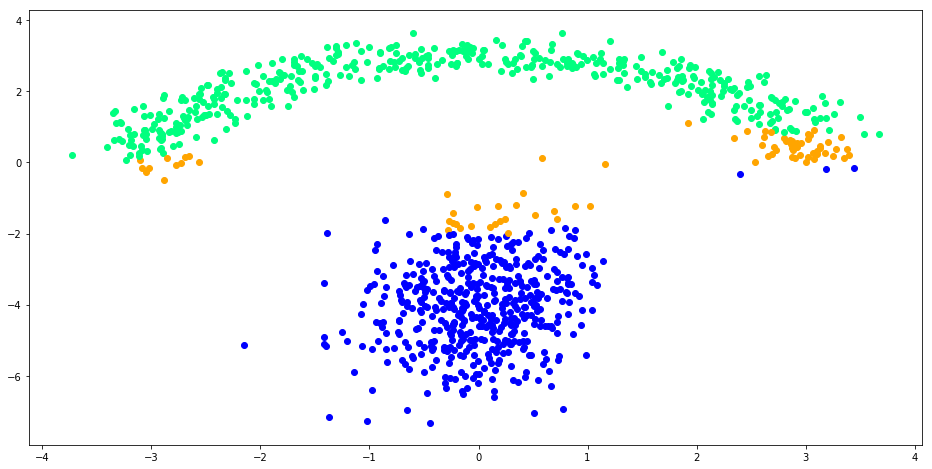

In [30]:
svm= SVM().set_params(C=0.01,kernel='poly', degree=3).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Vemos que para $C$= 0.01 la cantidad de vectores de soporte aumentó levemente respecto de la última configuración (desde los 16 hacia los 41). En cambio, si modificamos el nivel de regularización a 0.00001 se observa:

In [72]:
minimoNL= 0.00001
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

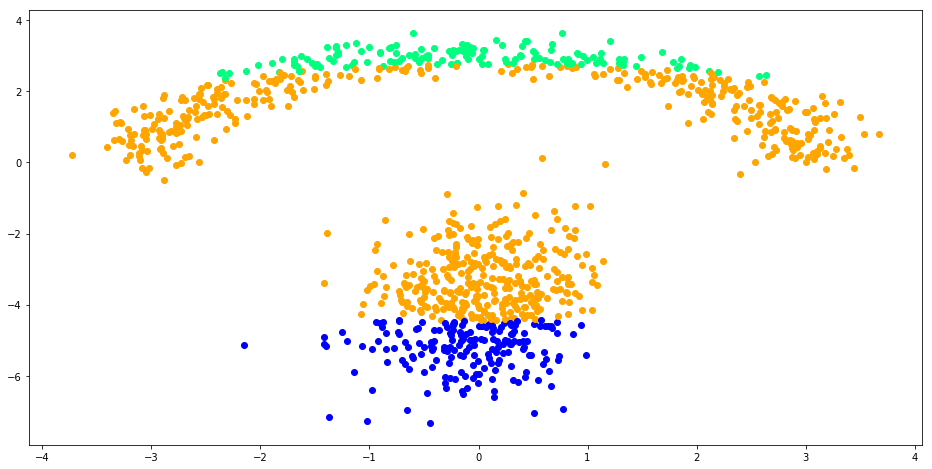

In [32]:
svm= SVM().set_params(C=0.00001,kernel='poly', degree=3).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

donde la cantidad de vectores de soporte aumentó enormemente (337), indicando también, la gran tolerancia a errores de este tipo de configuración ($C \rightarrow 0$).   
De igual manera, es posible notar que la frontera establecida, que es mucho más holgada respecto a modelos no regularizados. no separa de buena manera las clases, encontrándose numerables casos de mal clasificación (clase incorrecta). Esto, evidentemente se traducirá en un mal comportamiento frente a datos futuros.

###### Qué ocurre con un kernel cuadrático?

Se modifica el kernel de la última configuración del algoritmo de clasificación SVM para que, ahora, se utilice un kernel polinomial de grado 2.


In [73]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='poly',degree=2)
    model.fit(X,y)
    #print ("Vectores de soporte: \n", model.support_vectors_)
    y_p=model.predict(X)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model, y_p

In [74]:
minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

El número de vectores de soporte con $C$=0.01 fue alto (237) y la frontera de decisión no logra un buen comportamiento frente a los datos de entrenamiento. Aún así, a medida que se modifica el valor del parámetro $C$, la frontera varía de manera considerable pero se mantiene el hecho de que no se clasifican correctamente los datos.  
Frente a esta situación se configura el kernel polinomial a kernel de base radial.


##### RBF, Radial Basis Function

De manera intuitiva, el parámetro $gamma$ define qué tanto influye un dato de entrenamiento. Si su valor es bajo, entonces la frontera en base a los datos de entrenamiento será lejana. Si el valor es alto, será cercana. Es decir, $gamma$ se asemeja al inverso del radio de influencia de los datos de entrenamiento seleccionados por el algoritmo (vectores de soporte).

El parámetro $C$ representa un tradeoff entre la mal clasificación de los datos de entrenamiento versus la simplicidad de la frontera de decisión propuesta. Así entonces, un valor del parámetro $C$ bajo, provocará que la superficie sea simple pero incorrecta, mientras que un valor alto tendrá como objetivo clasificar correctamente los datos.

In [77]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf',gamma=0.7) 
    model.fit(X,y)
    #print ("Vectores de soporte: \n", model.support_vectors_)
    y_p=model.predict(X)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model, y_p

In [78]:
minimoNL= 0.01
maximoNL= 50
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

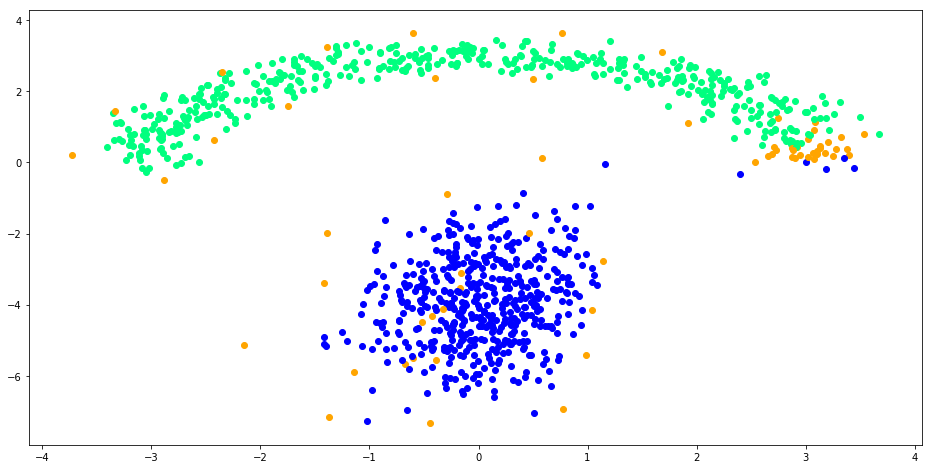

In [39]:
svm= SVM().set_params(C=49.9,kernel='rbf',gamma=0.7).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

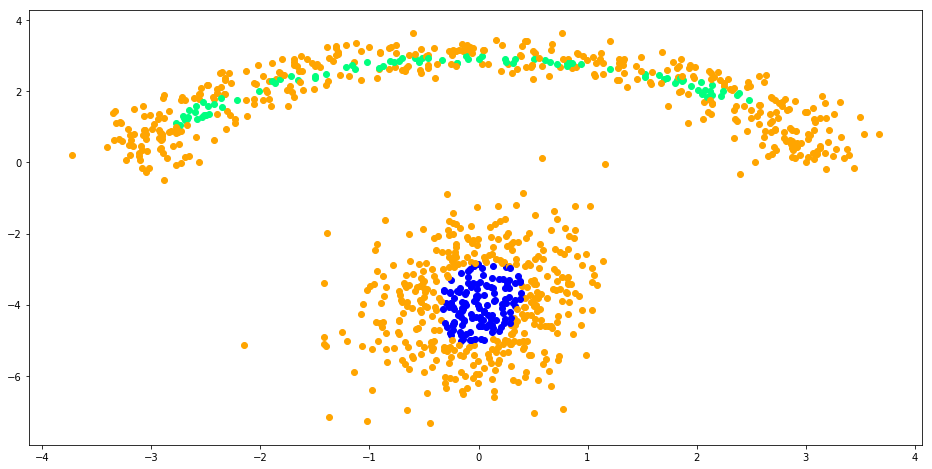

In [40]:
svm= SVM().set_params(C=0.01,kernel='rbf',gamma=0.7).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

En el gráfico presentado se evidencian (de color anaranjado) los vectores de soporte definidos para la determinación de la frontera de decisión para las clases en cuestión.  
Para el gráfico cuyo prámetro de regularización es 49.9 se logra una frontera de decisión mucho mejor que para $C$=0.01 utilizando menos vectores de soporte que para $C$ pequeño, es decir, para un modelo regularizado. 

A continuación se modifica el parámetro 'gamma' para analizar sus efectos:

In [79]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf',gamma=2) 
    model.fit(X,y)
    #print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    y_p=model.predict(X)
    return model, y_p

minimoNL= 0.01
maximoNL= 50
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

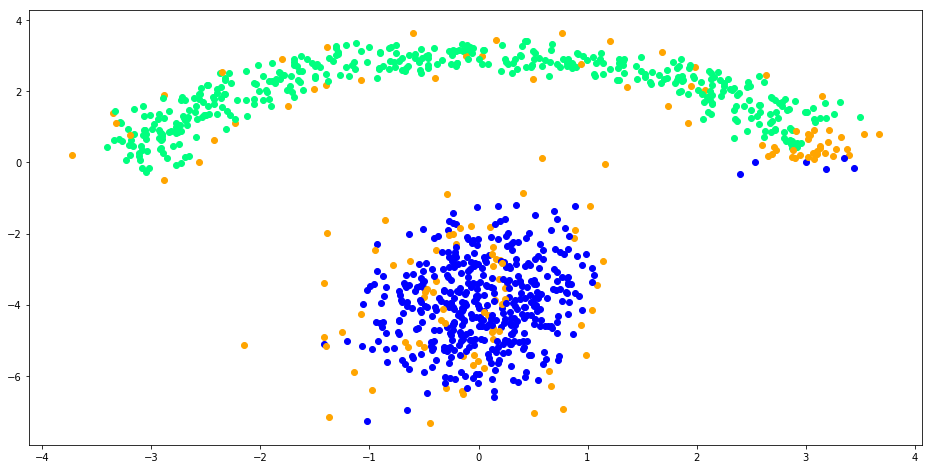

In [80]:
svm= SVM().set_params(C=49.9, kernel='rbf',gamma=2).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Respecto a la última configuración de gamma utilizada y manteniendo el parámetro $C$, es posible mencionar que el número de vectores de soporte aumentó considerablemente de 36 (gamma 0.7 y parámetro de regularización 0.01) a 93 (gamma 2.0 y parámetro de regularización 0.01) indicando que la complejidad del establecimiento de la frontera de decisión es mayor. Esto se explica por la modificación del parámetro 'gamma' puesto que al aumentar este valor, se le ordenó trabajar con una frontera de menor radio al algoritmo (más holgada/simple).

El análisis de lo que ocurre con un valor pequeño para $C$ se obvia puesto que se ha demostrado reiteradamente el efecto de éste dentro de las máquinas de soporte vectorial. 


###### Sigmoid

$K(\vec{x},\vec{x'}) =   tanh (\gamma \cdot \vec{x}^T \vec{x'} + 1)$

A continuación se modifica el kernel a trabajar por el algoritmo hacia 'sigmoid' con parámetros propios del kernel por defecto. Lo que observa es lo siguiente:

In [84]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='sigmoid')
    model.fit(X,y)
    #print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    y_p= model.predict(X)
    return model, y_p

minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

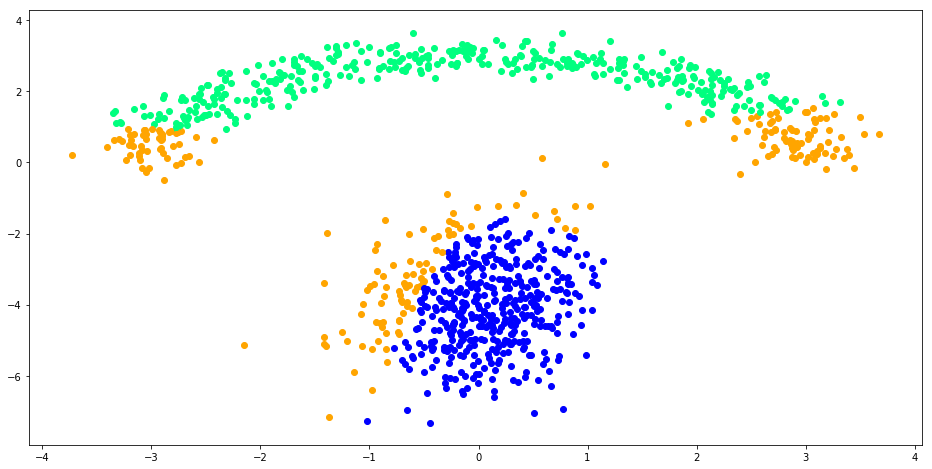

In [44]:
svm= SVM().set_params(C=0.01, kernel='sigmoid').fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

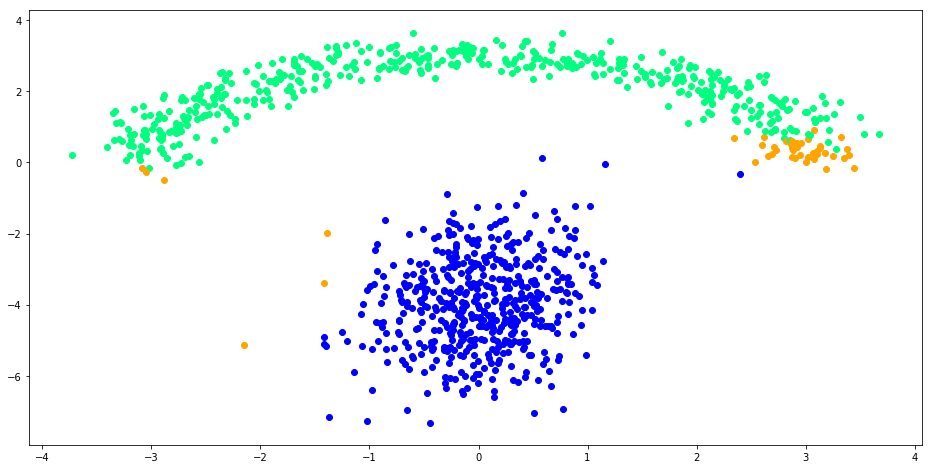

In [45]:
svm= SVM().set_params(C=9.9, kernel='sigmoid').fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Si bien esta última configuración hace uso de pocos datos de entrenamiento (vectores de soporte) para lograr establecer la frontera de decisión, en términos de eficacia, no resulta ser una buena opción la adopción de este kernel (bajo los parámetros por defecto de la libreria) puesto que existen muchos datos mal clasificados cuando $C$ toma valores pequeños. Cuando $C$ toma valores altos, si bien la clasificación no es tan equívoca, no logra superar el desempeño de otras configuraciones ya analizadas.  

A modo de conclusión, cuando los datos de entrenamiento son escasos, tal como en este ejercicio práctico, generalmente se cuenta con muchas fronteras que no presentan errores considerables. Entonces, es lógico preguntarse qué configuración se debe elegir para los futuros datos de test. Dada esta situación, aquella solución que logra el mayor margen posible entre el límite de decisión y los datos de la  clase en ambos lados se dice ser una buena opción.  
Esta decisión se basa en la idea de que es probable que un nuevo dato de la clase positiva caiga dentro o cerca de la frontera de la región (lo mismo para la clase negativa), Por lo tanto, asignar el mayor margen, proporciona mayor seguridad a la hora de clasificar los datos minimizando las posibilidades de que los datos crucen hacia la región equivocada.

Si bien el parámetro de regularización $C$ se utiliza con el fin de, como ya se ha mencionado, tolerar o no errores de clasificación en el establecimiento de la frontera de decisión, se observa que no siempre un valor bajo (modelo holgado) ayudará a la definición de la mejor frontera pues dependerá del kernel en uso y, por supuesto, de los datos.  
Aún más importante, asignar un valor demasiado extremista para el parámetro de regularización $C$ (muy alto) podría hacernos caer en overfitting puesto que se sobreajusta la frontera de decisión a los datos de entrenamiento no asegurando el objetivo principal de un algoritmo de aprendizaje automático, generalizar para lograr un buen comportamiento frente a los futuros datos.

###### h. Construir un Árbol de Decisión de múltiples niveles para la clasificación del problema. 

A continuación se ponen a prueba los distintos criterios de medición de calidad que existen para una división en un algoritmo de árbol. 

1. 'Gini' 
2. 'Entropy' 

A partir de cada una de estas configuraciones se trabajará con la altura de cada árbol. Es decir, el número de splits que se realizan a cada región de clase, alternando de característica. Como para este caso sólo se cuenta con 2 atributos, entonces el primer split se realizará en base a, por ejemplo, A_0 mientras que el segundo en base a A_1, el tercero ramificará las regiones obtenidas según una nueva decisión en base a A_0 y la cuarta en base a A_1, etc.  


######  1. Gini 

Medida de cuán a menudo un elemento escogido aleatoriamente sería etiquetado incorrectamente de acuerdo a la distribución de las etiquetas en el conjunto de entrenamiento.  

In [85]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_modelT(param):
    model = Tree() 
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    y_p=model.predict(X)
    return model, y_p

In [86]:
def visualize_border_interactiveT(param):
    model, y_p = train_modelT(param)
    visualize_border(model,X,y, y_p)

In [87]:
minimoT= 1
maximoT= 15
interactive(visualize_border_interactiveT,param=(minimoT,maximoT))

A Jupyter Widget

Haciendo uso del criterio Gini, se observa que para niveles de altura mayores o iguales a 10 no representan una variación al árbol de altura 9. De manera similar, desde el nivel 6 en adelante no se observan modificaciones considerables en el árbol de clasificación puesto que las regiones de la clase positiva o negativa no varían de manera evidente. Aún así, a mayor altura del árbol, mejor es el ajuste que éste tiene frente a los datos de entrenamiento. La pregunta es, ¿Esto se mantiene para futuros datos de test?   

Para responder esta pregunta se propone analizar el criterio Entropy y así determinar qué configuración es la de mejor comportamiento frente a los datos.


###### 2.  Entropy o ganancia de información

In [88]:
from sklearn.tree import DecisionTreeClassifier as Tree
#edit the train_model function
def train_modelT(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X,y)
    y_p=model.predict(X)
    return model, y_p

minimoT= 1
maximoT= 15
interactive(visualize_border_interactiveT,param=(minimoT,maximoT))

A Jupyter Widget

Para el criterio de clasificación Entropy, el árbol no presenta un nivel $N$ a partir del cual no se vea modificada la estructura de las regiones establecidas. Pero, de manera similar a la configuración basada en el criterio Gini, a partir del nivel 5-6 no se aprecian modificaciones considerables en ellas.   
Si se destaca la variación en cuanto a las variables por las que se realizan los primeros 2 splits puesto que rápidamente se llega a una definición de regiones muy clara y diferente que con criterio Entropy. Evidentemente las regiones obtenidas difieren donde para el primer caso se obtuvo una región similar a un cuadrado (inferior derecho), mientras que para Entropy se obtuvo una región correspondiente al rectángulo inferior de la imagen aproximadamente.

Puesto que para ambos casos, Gini y Entropy, cuando la altura del árbol se setea a valores altos, no se logran modificaciones importantes en las regiones definidas por el árbol, se procede a analizar qué ocurre cuando se especifica 'min_samples_split' que indica el porcentaje de datos mínimo requerido para hacer válido el split.  

Se setea este valor a 0.02%, es decir, 20 puntos de los 1000 datos de entrenamiento donde se observa:

In [50]:
def train_modelT(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best', min_samples_split=0.02)
    model.fit(X,y)
    y_p=model.predict(X)
    return model, y_p

minimoT= 2
maximoT= 15
interactive(visualize_border_interactiveT,param=(minimoT,maximoT))

A Jupyter Widget

Para alturas mayores a 6 no existen splits válidos puesto que el número de datos que caerían en la nueva sección de la clase en cuestión (región en cuestión) no supera el umbral establecido. Así entonces, se logra definir un árbol de clasificación que no caiga en overfitting puesto que no se sobreajusta el modelo a los datos de entrenamiento esperando lograr un buen desempeño frente a datos futuros.  

Recordar: A mayor altura, mayor nivel de especificación de cada región establecida. 

###### i. Construir un algoritmo K-NN para la clasificación del problema. 


La clasificación basada en vecinos esta basado en instancias que no construye un modelo general. La clasificación se realiza en base a la clase de los datos que tiene la mayor cantidad de representantes dentro de los K vecinos más cercanos
El problema que se plantea analizar corresponde al ajuste del parámetro $K$, es decir, la elección óptima del número de vecinos cercanos que la máquina deberá considerar a la hora de asignar una clase al dato de entrenamiento $X_i$ 

Con el propósito de ponderar a los vecinos de manera que los más cercanos contribuyan más al ajuste se le agrega el keyword 'weights' al máquina. Cabe mencionar que el valor predeterminado para ésta corresponde a 'uniform' que asigna pesos uniformes a cada vecino, mientras que 'distance' asigna pesos proporcionales a la inversa de la distancia que existe entre el punto de entrenamiento y su vecino.  

##### Uniform


In [51]:
from sklearn.neighbors import KNeighborsClassifier
def train_modelK(param):
    model = KNeighborsClassifier() #weights= 'uniform'
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    y_p=model.predict(X)
    print (sum(y_p))
    return model, y_p

In [52]:
def visualize_border_interactiveK(param):
    model, y_p = train_modelK(param)
    visualize_border(model,X,y, y_p)

In [53]:
minimoK= 1
maximoK= 50
interactive(visualize_border_interactiveK,param=(minimoK,maximoK))

A Jupyter Widget

##### Distance

In [54]:
from sklearn.neighbors import KNeighborsClassifier
#edit the train_model function
def train_modelK(param):
    model = KNeighborsClassifier(weights= 'distance')
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    y_p=model.predict(X)
    print (sum(y_p))
    return model, y_p

In [55]:
minimoK= 1
maximoK= 50
interactive(visualize_border_interactiveK,param=(minimoK,maximoK))

A Jupyter Widget

Si bien el parámetro $K$ depende en gran medida de los datos, se observa que en general, un valor para $K$ más grande suprime los efectos del ruido permitiendo clasificar en base a una cantidad de vecinos más cercanos considerable pero, a su vez, hace más difusa la tarea. Es decir, los 'límites' de clasificación son menos diferenciables puesto que el umbral de vecinos más cercanos es bajo.

De manera adicional, cabe destacar igualmente que asignar pesos a los vecinos más cercanos bajo cierto índice, como lo es la distancia al punto, permite obtener un mejor comportamiento de la máquina a la hora de clasificar. Esto ocurre debido a que, dentro de los k-vecinos más cercanos, aquellos más próximos tendrán mayor ponderancia en la asignación de la clase. Dicha situación se observa en los gráficos, donde claramente pesos uniformes obtiene mayor error que pesos según distancia. Aún así, cabe mencionar que no porque obtenga error nulo frente a los datos de entrenamiento, se tendrá igual comportamiento frente a futuros datos. 